In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV
from scipy import stats
%matplotlib inline

**Loading The Dataset**

In [2]:
df = pd.read_csv('/kaggle/input/housesalesprediction/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


****

# Cleaning The Dataset

###  Checking For Null Values

In [3]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

**no null values**

### Cheking For Duplicates

In [4]:
df.duplicated().sum()

0

**no duplicates**

### Cheking For Datatypes

In [5]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

** We Can Notice That the Date Column Is Object Datatype**

In [6]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

**After Creating The year, month, day Columns We Can Drop The Date Column**

In [7]:
df.drop(['id', 'date'], axis=1, inplace=True)

In [8]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


# Exploratory Data Analysis

In [9]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,...,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,2014.322954,6.574423,15.688197
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,...,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.467616,3.115308,8.635063
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,...,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000,1.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,2014.000000,4.000000,8.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,2014.000000,6.000000,16.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,9.000000,23.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,12.000000,31.000000


### **Checking The Average Price By Year**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='year', ylabel='price'>

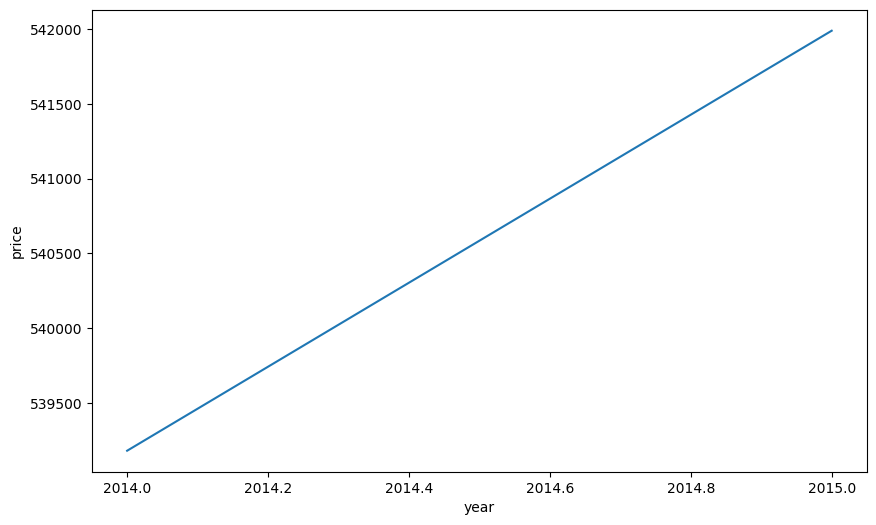

In [10]:
plt.figure(figsize=(10,6))
avg_price= df.groupby(['year'])['price'].mean().reset_index()
sns.lineplot(x='year', y='price', data=avg_price)

**we can see thtat the average price inceases through the years**

### **Checking The Numver of sales**

**By Year**

<Axes: xlabel='year', ylabel='price'>

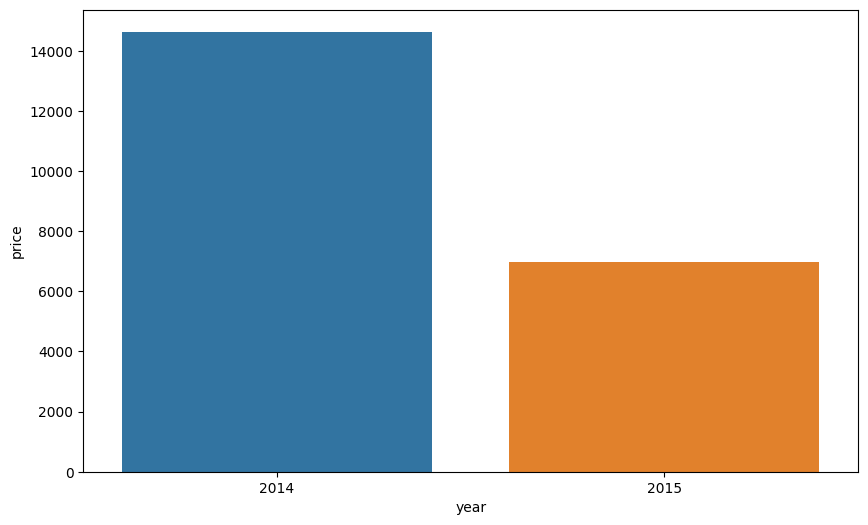

In [11]:
avg_price= df.groupby(['year'])['price'].count().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='year', y='price', data=avg_price)

**by Month**

<Axes: xlabel='month', ylabel='price'>

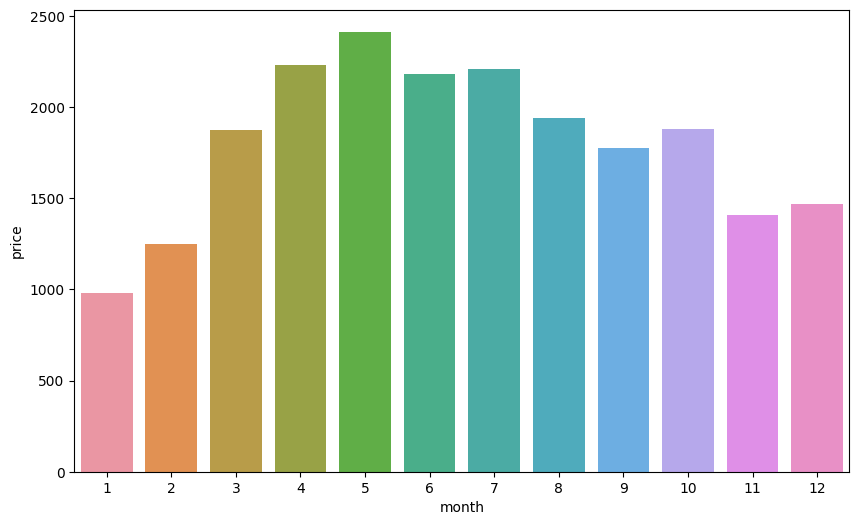

In [12]:
avg_price= df.groupby(['month'])['price'].count().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='month', y='price', data=avg_price)

**June Has the most number of sales**

### **Checking The Price Range**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

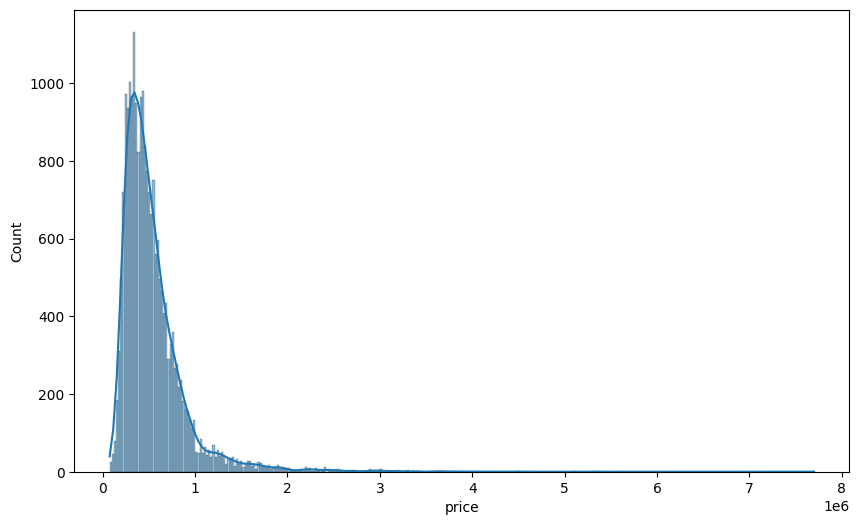

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'], kde=True)

**we can see that the price is right skewed**

let's seperate the price into 3 categories

In [14]:
bins = np.linspace(min(df['price']), max(df['price']), 4)
group_names = ['Low', 'Medium', 'High']
df['price_range'] = pd.cut(df['price'], bins, labels=group_names, include_lowest=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,price_range
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,98178,47.5112,-122.257,1340,5650,2014,10,13,Low
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,1991,98125,47.7210,-122.319,1690,7639,2014,12,9,Low
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,98028,47.7379,-122.233,2720,8062,2015,2,25,Low
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,0,98136,47.5208,-122.393,1360,5000,2014,12,9,Low
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,98074,47.6168,-122.045,1800,7503,2015,2,18,Low


In [15]:
df['price_range'].value_counts()

price_range
Low       21531
Medium       76
High          6
Name: count, dtype: int64

*most of the houses are in the low category*

### **Checking The Price Range By Year**

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


<Axes: xlabel='price_range', ylabel='count'>

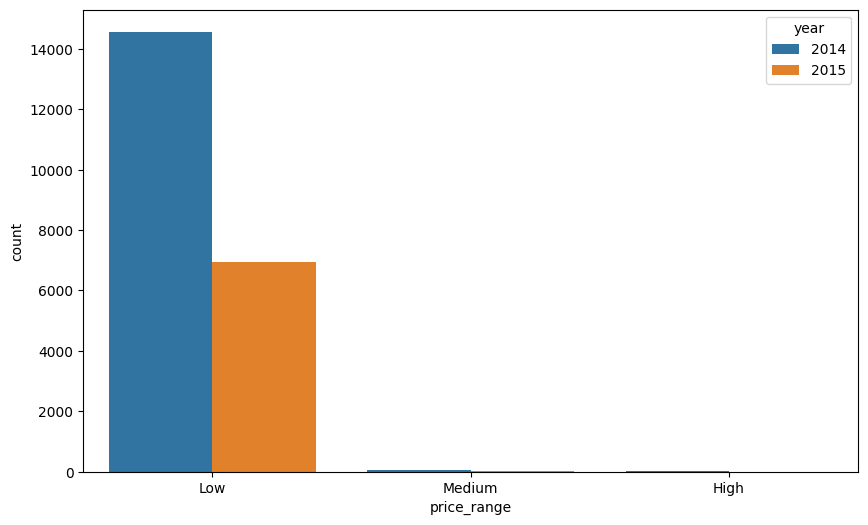

In [16]:
plt.figure(figsize=(10,6))
price_range = df.groupby(['year'])['price_range'].value_counts(normalize=False).reset_index()
sns.barplot(x='price_range', y='count', data=price_range, hue='year')

# Price Correlation 

In [17]:
df.dtypes

price             float64
bedrooms            int64
bathrooms         float64
sqft_living         int64
sqft_lot            int64
floors            float64
waterfront          int64
view                int64
condition           int64
grade               int64
sqft_above          int64
sqft_basement       int64
yr_built            int64
yr_renovated        int64
zipcode             int64
lat               float64
long              float64
sqft_living15       int64
sqft_lot15          int64
year                int32
month               int32
day                 int32
price_range      category
dtype: object

In [18]:
numeric_features = df.select_dtypes(include=['int64','int32', 'float64'])
numeric_features.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


<Axes: >

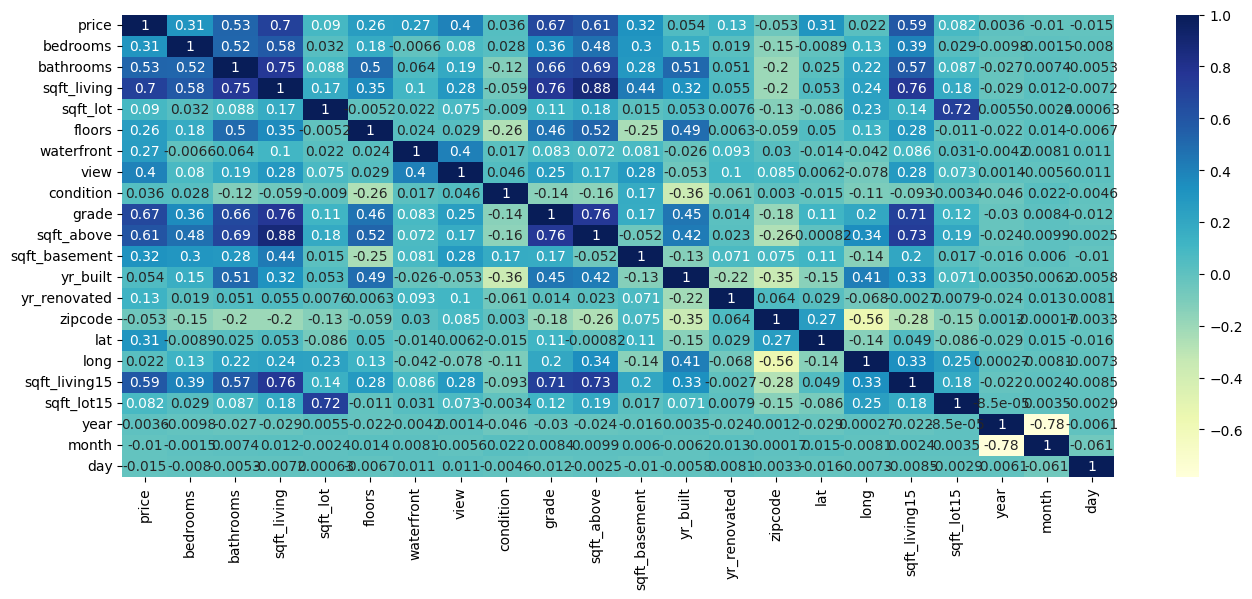

In [19]:
plt.figure(figsize=(16,6))
sns.heatmap(numeric_features.corr(), annot=True, cmap='YlGnBu')

**by this we can see that the price and sqft_living are highly correlated**

<Axes: xlabel='sqft_living', ylabel='price'>

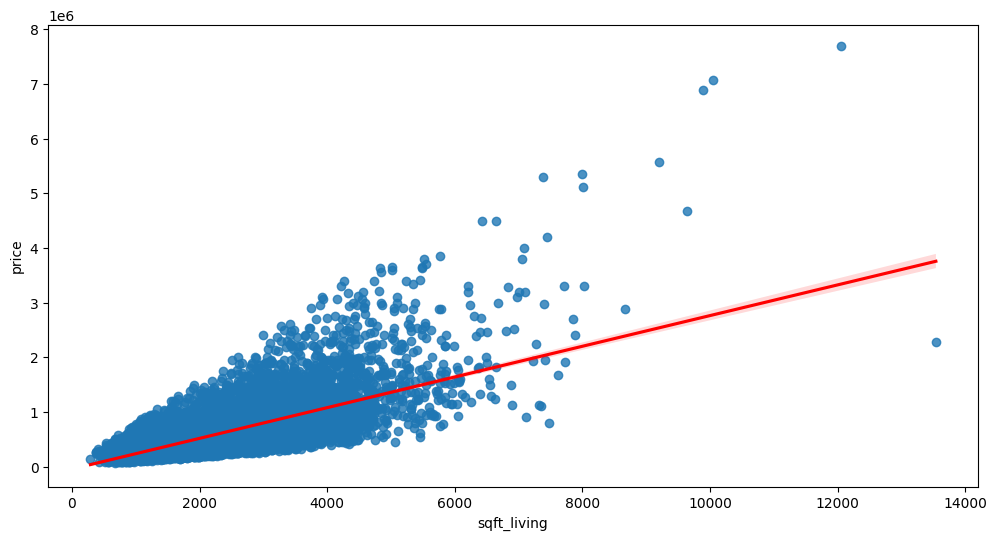

In [20]:
plt.figure(figsize=(12,6))
sns.regplot(x='sqft_living', y='price',line_kws={'color': 'red'}, data=df)

**We Can See That There Is A Positive Correlation**

In [21]:
pearson_coef, p_value=stats.pearsonr(df['price'] ,df['sqft_living'])
print(f"The Pearson Correlation Coefficient is {pearson_coef} with a P-value of {p_value}")

The Pearson Correlation Coefficient is 0.7020350546118 with a P-value of 0.0


### Linear Regression

**First Let's Split The Dataset**

In [22]:
X_lr= df[['sqft_living']]
Y= df['price']
x_train_lr, x_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, Y, test_size=0.10)

In [23]:
lr = LinearRegression()
lr.fit(x_train_lr, y_train_lr)
Y_hat_lr = lr.predict(x_test_lr)

print(f'''R2 score: {r2_score(y_test_lr, Y_hat_lr)} ,
Mean squared error: {mean_squared_error(y_test_lr, Y_hat_lr)}''')


R2 score: 0.5038277234381656 ,
Mean squared error: 64779662394.548035


### Multiple Linear Regression

In [24]:
X_mlr= df.drop(['price', 'price_range'], axis=1)
Y= df['price']
x_train_mlr, x_test_mlr, y_train_mlr, y_test_mlr = train_test_split(X_mlr, Y, test_size=0.10)
mlr = LinearRegression()
mlr.fit(x_train_mlr, y_train_mlr)
Y_hat_mlr = mlr.predict(x_test_mlr)

print(f'''R2 score: {r2_score(y_test_mlr, Y_hat_mlr)} ,
Mean squared error: {mean_squared_error(y_test_mlr, Y_hat_mlr)}''')


R2 score: 0.6918288990773268 ,
Mean squared error: 33820042507.88428


### Polynomial Regression

In [25]:
X_lr= df['sqft_living']
Y= df['price']
x_train_lr, x_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, Y, test_size=0.10)
f = np.polyfit(x_train_lr,y_train_lr, 2)
p = np.poly1d(f)
Y_hat_poly = p(x_test_lr)
print(f'''R2 score: {r2_score(y_test_lr, Y_hat_poly)} ,
Mean squared error: {mean_squared_error(y_test_lr, Y_hat_poly)}''')

R2 score: 0.5616932587742323 ,
Mean squared error: 54579449617.508545


In [26]:
pr= PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train_mlr)
x_test_pr = pr.fit_transform(x_test_mlr)

RidgeModel = Ridge(alpha=0.1)
RidgeModel.fit(x_train_pr, y_train_mlr)
Y_hat_ridge = RidgeModel.predict(x_test_pr)

print(f'''R2 score: {r2_score(y_test_mlr, Y_hat_ridge)} ,
Mean squared error: {mean_squared_error(y_test_mlr, Y_hat_ridge)}''')

R2 score: 0.8130002452530561 ,
Mean squared error: 20522169780.26272


**We Can See That The Ridge Regression Is Better Due to the high R^2 score**

### Now Lets Predict The Price and Compare With The Actual Price

In [27]:
X_Final = pr.fit_transform(X_mlr)

Y_Predicted=RidgeModel.predict(X_Final)

In [28]:
new_df= {"Actual": Y, "Predicted": Y_Predicted, 'Factor':x_test_mlr['sqft_living']}
new_df = pd.DataFrame(new_df)

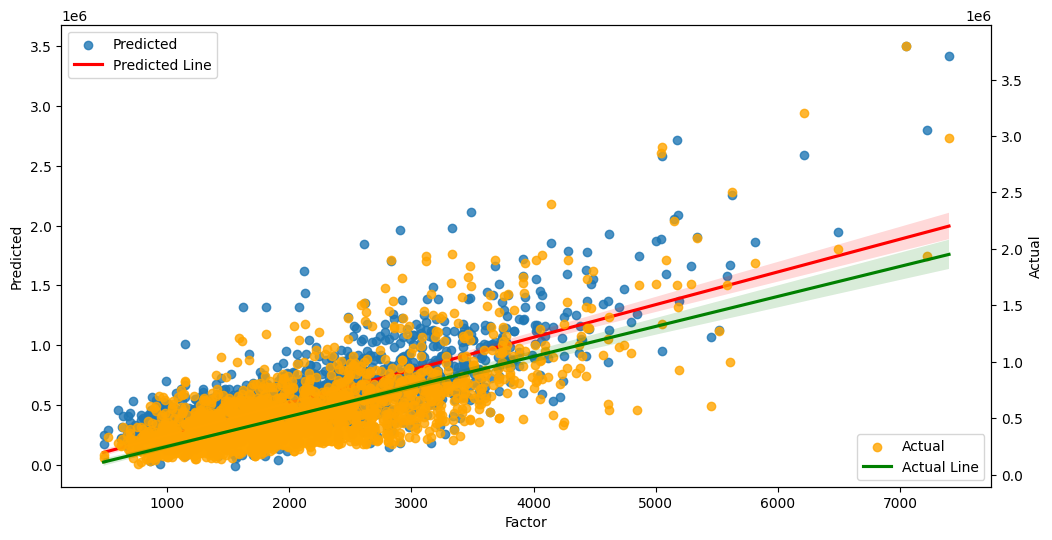

In [29]:
plt.figure(figsize=(12,6))
sns.regplot(x='Factor', y='Predicted',line_kws={'color': 'red'}, data=new_df)
plt.legend(labels=['Predicted','Predicted Line'])
ax2 = plt.twinx()
sns.regplot(x='Factor', y='Actual',color='orange',line_kws={'color': 'green'},ax=ax2,
                data=new_df)
plt.legend(loc="lower right",labels=['Actual','Actual Line'])

**We can see that the predicted price is close to the actual price so it's possible to use this model**

### Conclusion

**After Preforming Data Cleaning, Analysis And Prediction, We Can See The Following Results.**
1. House Avg Prices Tend To Increase Through The Years.
2. House With Low Prices Tend To Have Low Square Footage.
3. Most Sales Were In The Low Price Range.
4. There Is A Positive Correlation Between Price And Square Footage.
5. The Ridge Model Is Better Due To The High R^2 Score.
6. The Predicted Price Is Close To The Actual Price.